# Predicting Health Insurance Price for an individual or family

People’s healthcare cost forecasting is now a valuable tool for improving healthcare accountability. The healthcare sector produces a very large amount of data related to patients, diseases, and diagnosis, but since it has not been analyzed properly, it does not provide the significance which it holds along with the patient healthcare cost.

A health insurance policy is a policy that covers or minimises the expenses of losses caused by a variety of hazards. A variety of factors influence the cost of insurance or healthcare. For a variety of stakeholders and health departments, accurately predicting individual healthcare expenses using prediction models is critical. Accurate cost estimates can help health insurers and, increasingly, healthcare delivery organisations to plan for the future and prioritise the allocation of limited care management resources. Furthermore, knowing ahead of time what their probable expenses for the future can assist patients to choose insurance plans with appropriate deductibles and premiums. These elements play a role in the development of insurance policies.

In the insurance sector, ML can help enhance the efficiency of policy wording.health insurance company can only make money if it collects more than it spends on the medical care of its beneficiaries

The venerable insurance industry is no stranger to data driven decision making. Yet in today's rapidly transforming digital landscape, Insurance is struggling to adapt and benefit from new technologies compared to other industries, even within the BFSI sphere (compared to the Banking sector for example.) Extremely complex underwriting rule-sets that are radically different in different product lines, many non-KYC environments with a lack of centralized customer information base, complex relationship with consumers in traditional risk underwriting where sometimes customer centricity runs reverse to business profit, inertia of regulatory compliance - are some of the unique challenges faced by Insurance Business.
This relatively simple dataset should be an excellent starting point for EDA, Statistical Analysis and Hypothesis testing and training Linear Regression models for predicting Insurance Premium Charges.


Based on the data below, health care charges increase the older you get. As most of us get older, we are prone to more health issue due to the basic effects of aging. There are some unexplainable drops in charges in certain age groups however from a linear regression standpoint, there is a consistent upward increase in charges as we get older.

It can help individuals and families make more informed decisions about their health insurance coverage. By understanding the likely costs of different plans, individuals can choose a plan that best fits their budget and meets their healthcare needs.

It can help employers offer more competitive benefits packages to their employees. By understanding the likely costs of different plans, employers can offer plans that are both affordable and provide good coverage, which can help attract and retain employees.

It can help insurers and healthcare providers better manage costs. By understanding the likely costs of different plans, insurers and healthcare providers can develop strategies to reduce costs, such as negotiating lower prices with providers or encouraging the use of preventative care.

It can help policymakers make more informed decisions about healthcare reform. By understanding the likely costs of different plans, policymakers can design healthcare reform proposals that are more likely to be affordable and effective.

Overall, predicting health insurance costs accurately can have a significant impact on the healthcare/insurance field by helping individuals, employers, insurers, providers, and policymakers make better decisions about health insurance coverage and healthcare reform.

Emerging technologies like AI, Machine Learning, Block Chain, Cloud Computing and Big Data Analytics have brought a radical change in today's global financial landscape. As traditional business models adapt and evolve to harness the promise of these technologies, and the barriers between various 'specialized' domains across industries slowly dissolve, more and more industries are adopting a Digital Transformation Strategy. Insurance is no exception.

The Insurance sector is no stranger to data driven decision making. Yet AI and Big Data are revolutionizing the industry. The following image briefly illustrates the digital transformation in Insurance today, and the role played by Analytics:

## some basic understanding about the dataset

As we can see, we got these features:

age: age of the primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body Mass Index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg/m²) using the ratio of height to weight, ideally 18.5 to 24.9

children: number of children covered by health insurance, number of dependents

smoker: smoking or not

region: the beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

charges: individual medical costs billed by health insurance

Since we are predicting insurance costs, charges will be our target feature.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
insurance_data=pd.read_excel("C:\\Users\\shaji\\Downloads\\Health_insurance_cost.xlsx")

In [3]:
data=insurance_data.copy()

In [4]:
data.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   float64
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


# categorical features 
* gender
* smoking_status          
* location 


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.shape # from here we can observe that there is one duplicate in our data set and we are droping it 

(1337, 7)

In [9]:
data.describe()

,age,BMI,Children,health_insurance_price
count,1309.000000,1314.000000,1337.000000,1335.000000
mean,39.181818,30.638253,1.095737,13277.238554
std,14.049681,6.112628,1.205571,12113.150034
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.205000,0.000000,4746.698450
50%,39.000000,30.305000,1.000000,9386.161300
75%,51.000000,34.580000,2.000000,16622.107580
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
data.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [11]:
data.isnull().mean() * 100 # percentage of missing values

age                       2.094241
gender                    0.000000
BMI                       1.720269
Children                  0.000000
smoking_status            0.000000
location                  0.000000
health_insurance_price    0.149589
dtype: float64

In [12]:
data.skew(numeric_only=True)

age                       0.056463
BMI                       0.299109
Children                  0.937421
health_insurance_price    1.516765
dtype: float64

In [13]:
mean=data["age"].mean()  

In [14]:
data["age"].fillna(mean, inplace=True) # as there is less skewness in age, filling it with mean

In [15]:
mean=data["BMI"].mean() # as there 

In [16]:
data["BMI"].fillna(mean, inplace=True) # as there is less skewness in bmi , filling it with mean

In [17]:
data.isnull().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    2
dtype: int64

In [18]:
data_after_imputation=data.copy()

In [19]:
data=data.dropna()

In [20]:
data.shape

(1335, 7)

In [21]:
final_data=data.copy()

<AxesSubplot:xlabel='BMI'>

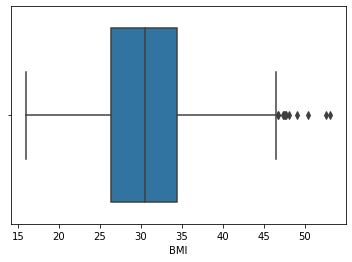

In [22]:
sns.boxplot(x=data['BMI'])

In [24]:
q1,q3=np.percentile(data['BMI'],[25,75]) # there are no extreme outliers so no need to worry

iqr = q3 - q1
lower = q1 - 3 *iqr
higher = q3 + 3 *iqr

outliers=data['BMI'][data['BMI']>higher] 
outliers

Series([], Name: BMI, dtype: float64)

In [25]:
outliers.sort_values()

Series([], Name: BMI, dtype: float64)

<AxesSubplot:xlabel='age'>

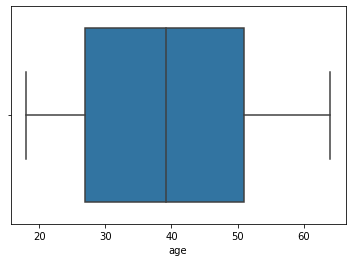

In [25]:
sns.boxplot(x=data['age']) # we can see there are no outliers in age colunm

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1335 non-null   float64
 1   gender                  1335 non-null   object 
 2   BMI                     1335 non-null   float64
 3   Children                1335 non-null   float64
 4   smoking_status          1335 non-null   object 
 5   location                1335 non-null   object 
 6   health_insurance_price  1335 non-null   float64
dtypes: float64(4), object(3)
memory usage: 83.4+ KB


In [27]:
##Converting objects labels into categorical
data[['gender', 'smoking_status', 'location']] = data[['gender', 'smoking_status', 'location']].astype('category')
data.dtypes

age                        float64
gender                    category
BMI                        float64
Children                   float64
smoking_status            category
location                  category
health_insurance_price     float64
dtype: object

<AxesSubplot:>

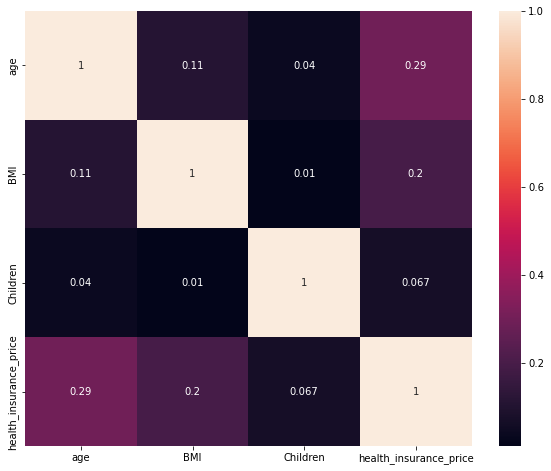

In [29]:
plt.figure(figsize=(10,8))
condition=data.corr(method = 'pearson')

#plot heat map
sns.heatmap(condition,annot=True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


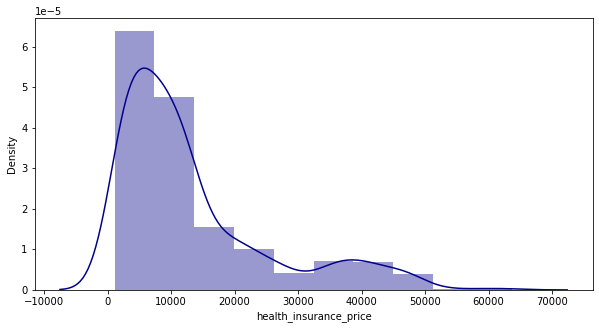

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(data['health_insurance_price'],bins=10,color='darkblue')
plt.show()

Distribution of expenses is right skewed.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


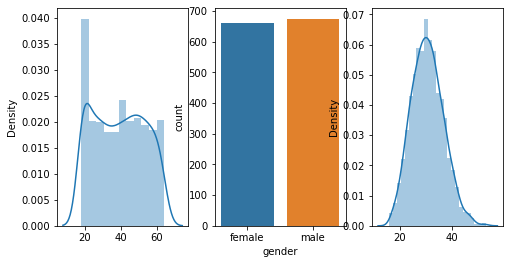

<Figure size 432x288 with 0 Axes>

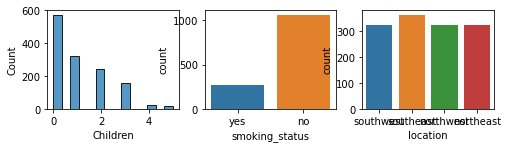

In [45]:
plt.figure(figsize=(8,4))
plt.figure(1)
plt.subplot(131)
sns.distplot(x=data['age'],kde=True)
plt.subplot(132)
sns.countplot(x=data['gender'])
plt.subplot(133)
sns.distplot(x=data['BMI'],kde=True)
plt.figure(2)
plt.figure(figsize=(8,4))
plt.subplot(231)
sns.histplot(x=data['Children'])
plt.subplot(232)
sns.countplot(x=data['smoking_status'])
plt.subplot(233)
sns.countplot(x=data['location'])
plt.show()

# multi variate analysis

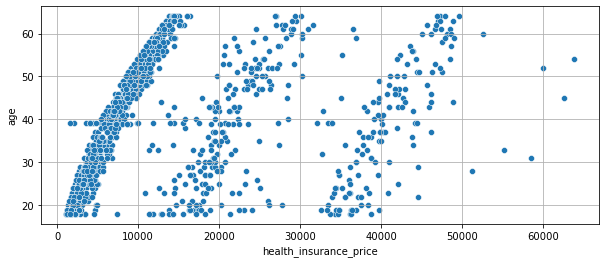

In [41]:
plt.figure(figsize=(10,4))
sns.scatterplot(y=data['age'],x=data['health_insurance_price'])
plt.grid(True)
plt.show()

By this we can observe that younger applicats are having lower health insurance price as compared to the older applicants

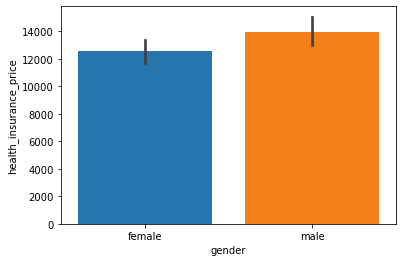

In [44]:
sns.barplot(x='gender',y='health_insurance_price',data=data,saturation=0.9)
plt.show()

Male applicant have a bit higher expense as compared to female.

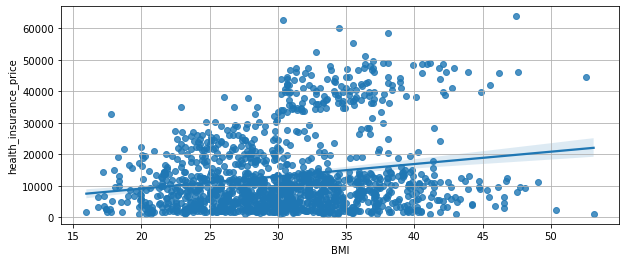

In [48]:
plt.figure(figsize=(10,4))
sns.regplot(x=data['BMI'],y=data['health_insurance_price'])
plt.grid(True)
plt.show()

There is a slight positive relation between BMI and expense

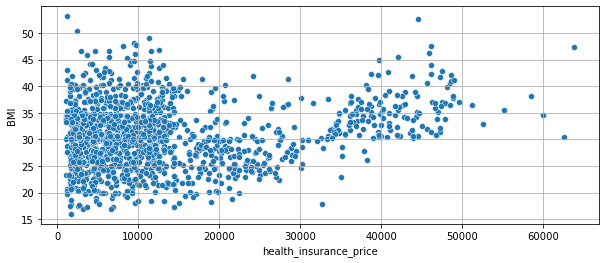

In [49]:
plt.figure(figsize=(10,4)
sns.scatterplot(y=data['BMI'],x=data['health_insurance_price'])
plt.grid(True)
plt.show()

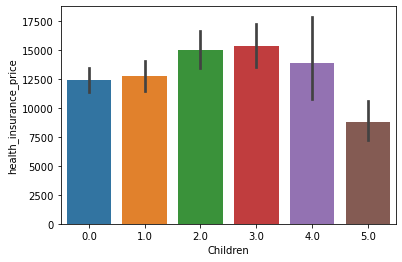

In [52]:
sns.barplot(x='Children',y='health_insurance_price',data=data)
plt.show()

Applicant with 2 or 3 children have higher expenses

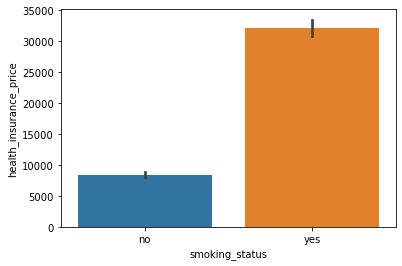

In [53]:
sns.barplot(x='smoking_status',y='health_insurance_price',data=data)
plt.show()

Smokers have insurance of high expense

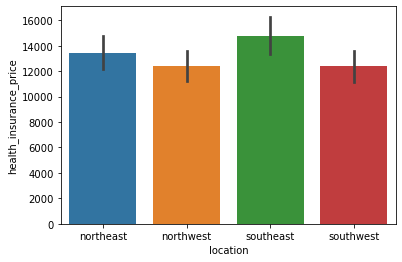

In [54]:
sns.barplot(x='location',y='health_insurance_price',data=data)
plt.show()

In [ ]:
Applicant from southeast have higher expenses.

In [55]:
data.shape

(1335, 7)

In [61]:
data_before_encoding=data.copy()

In [62]:
data=pd.get_dummies(data=data,drop_first=True)

In [63]:
data.head()

,age,BMI,Children,health_insurance_price,gender_male,smoking_status_yes,location_northwest,location_southeast,location_southwest
0,19.0,30.638253,0.0,16884.92400,0,1,0,0,1
1,18.0,33.770000,1.0,1725.55230,1,0,0,1,0
2,28.0,33.000000,3.0,4449.46200,1,0,0,1,0
3,33.0,22.705000,0.0,21984.47061,1,0,1,0,0
4,32.0,28.880000,0.0,3866.85520,1,0,1,0,0


In [64]:
data.shape

(1335, 9)

# Test train split


In [66]:
X=data.drop('health_insurance_price',axis=1)
y=data.health_insurance_price

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2)

# linear regression

In [70]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [74]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [75]:
y_pred = lm.predict(X_train)

In [76]:
r2 = r2_score(y_true=y_train,y_pred=y_pred)
print(r2)

0.7493402426892692


# DecisionTreeRegressor

In [77]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor(random_state=2)
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)

In [82]:
scores=[]
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [83]:
scores.append({
        'model': 'Decision Tree',
        'r2_score': r2_score(y_test, pred_dt)*100,
    'MS_score' : mean_squared_error(y_test,pred_dt)
    })

pred=pred_dt

print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_dt))

Testing R2 Score:  67.59080530736232 
Testing mean squared:  44827179.40862877


# DecisionTreeRegressor

In [84]:
from sklearn.tree import DecisionTreeRegressor

model_dt= DecisionTreeRegressor(random_state=12)
model_dt.fit(X_train,y_train)
pred_dt=model_dt.predict(X_test)

In [85]:
scores.append({
        'model': 'Decision Tree',
        'r2_score': r2_score(y_test, pred_dt)*100,
    'MS_score' : mean_squared_error(y_test,pred_dt)
    })

pred=pred_dt

print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_dt))

Testing R2 Score:  65.22273300312717 
Testing mean squared:  48102607.972692065


# RandomForestRegressor

In [86]:
from sklearn.ensemble import  RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)
pred_rf= model_rf.predict(X_test)

In [87]:
scores.append({
        'model': 'Random Forest',
        'r2_score': r2_score(y_test, pred_rf)*100,
    'MS_score' : mean_squared_error(y_test,pred_rf)
    })

pred=pred_rf

print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_rf))

Testing R2 Score:  81.8405932693326 
Testing mean squared:  25117408.53760894


# XGBRFRegressor

In [91]:
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [93]:
from xgboost import XGBRFRegressor

model_xgb = XGBRFRegressor()
model_xgb.fit(X_train, y_train)
pred_xgb = model_xgb.predict(X_test)

In [94]:
scores.append({
        'model': 'XGB regressor',
        'r2_score': r2_score(y_test, pred_xgb)*100,
    'MS_score' : mean_squared_error(y_test,pred_xgb)
    })

pred=pred_xgb

print('Testing R2 Score: ', r2_score(y_test, pred_xgb)*100,
      '\nTesting mean squared: ', mean_squared_error(y_test,pred_xgb))

Testing R2 Score:  84.57124260663099 
Testing mean squared:  21340477.055478197
